In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
# Fetching the California Housing Dataset and storing it in a variable
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     blocs and Probability Letters, 33 (1997) 291-297 group longitude


In [42]:
X, y = housing.data, housing.target
feature_names = housing.feature_names

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Feature names:", feature_names)

Shape of X: (20640, 8)
Shape of y: (20640,)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [43]:
#Stacking X and y horizontally into a single matrix mat
mat = np.column_stack((X,y))

# Converting the matrix into a dataframe. Column names are the feature_names, concatenated with the target variable name 'MEDV' (MEDV is the median value of owner-occupied homes)
df = pd.DataFrame(mat, columns=np.append(feature_names, 'MEDV'))
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [44]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [45]:
# Corelation Matrix
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MEDV,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Correlation Matrix shows how closely related, two variables are. The values range from -1 to 1.  If the value is 1, it says that the variables are exactly same (Maximum Corelation). If it is -1, it means that the variables are exact opposite and if it is 0, it means there is no relation between them

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


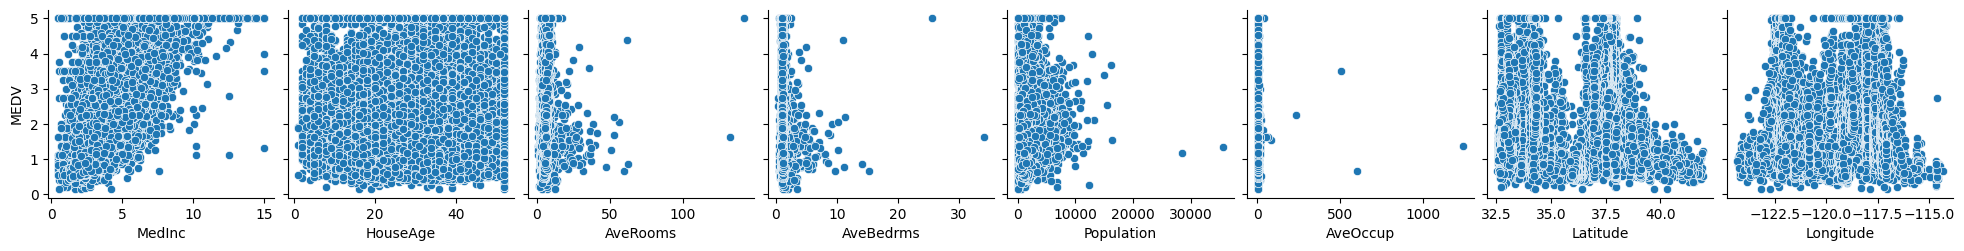

In [47]:
sns.pairplot(data=df, y_vars=['MEDV'], x_vars=feature_names)

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

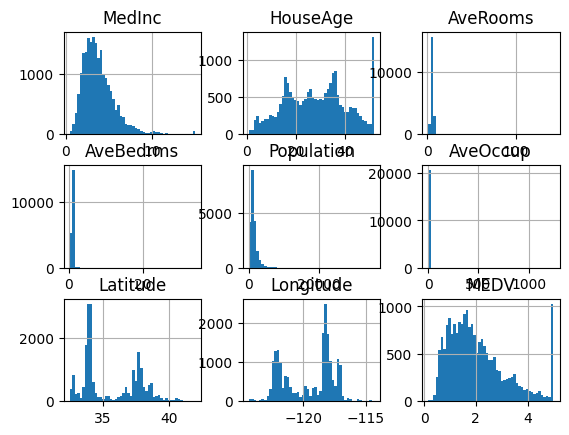

In [48]:
df.hist(bins=50)

<Axes: xlabel='Longitude', ylabel='Latitude'>

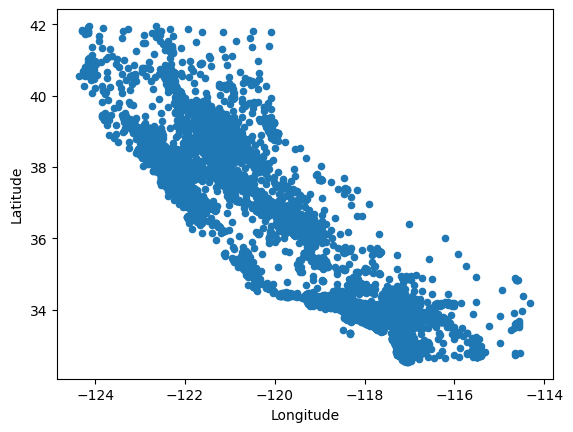

In [49]:
df.plot(kind="scatter", x="Longitude", y="Latitude")

<Axes: xlabel='Longitude', ylabel='Latitude'>

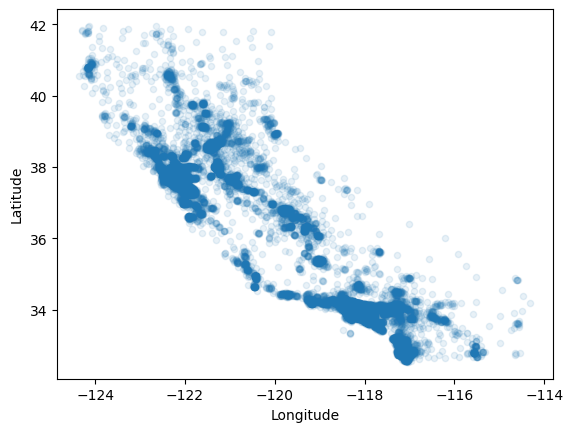

In [50]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

<Axes: xlabel='Longitude', ylabel='Latitude'>

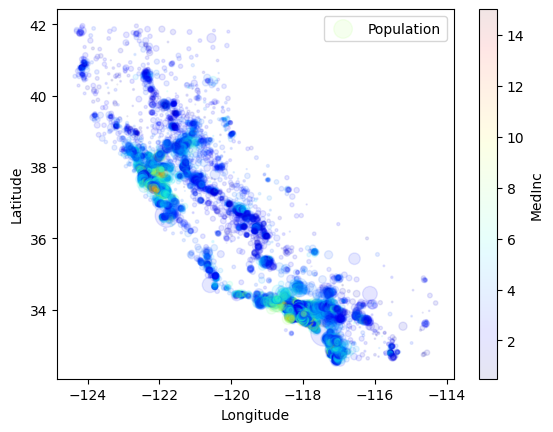

In [51]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1,
       s=df["Population"]/100, label="Population",
       c="MedInc", cmap=plt.get_cmap("jet"))

Heatmap of the distribution of houses according to the median income of the owners

In [52]:
#defining a function to scatter plot the relation between x and y
def plot_data(x,y):
    plt.scatter(x,y, s=5)
    plt.xlabel('Number of Rooms')
    plt.ylabel('Price (in $1000)')
    plt.title('California Housing Prices')

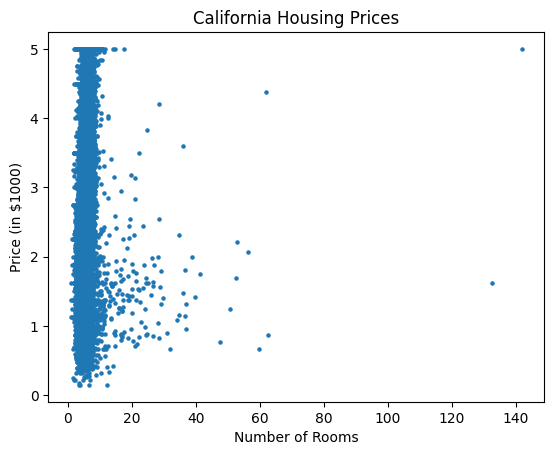

In [53]:
#Plotting the graph of number of rooms vs their price 

# Here the 2 signifies the third column of the dataset which is the number of rooms
x=X[:,2]
plot_data(x,y)

### Finding the Best Regression Line
Here we are trying to find the best regression line using the Univariate Linear Regression formula.

Univariate Linear Regression is the line of the form:
h(x) = w0 + w1x

where, 

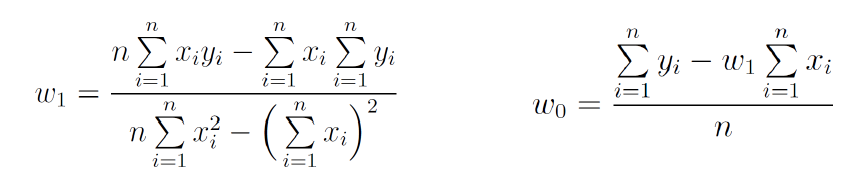

In [54]:
x=X[:,2]
n = len(x)
w1 = (n* x.dot(y) - (x.sum() * y.sum()))/ (n * (x**2).sum() - x.sum()**2)
w0 = (y.sum() - w1 * x.sum()) / n

w0,w1

(1.6838115086404783, 0.07086879328040628)

From the output, we can say that the regression line is
y = 1.683 + 0.0708x

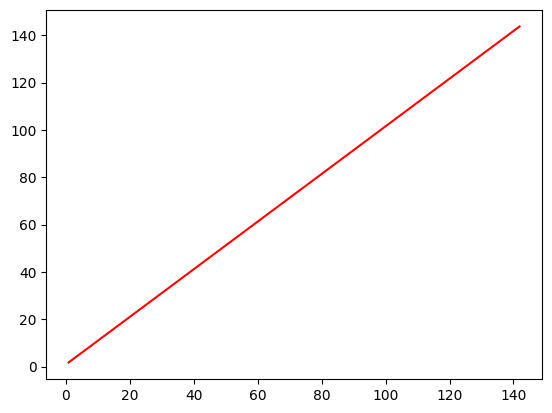

In [55]:
x0 = x.min()
x1 = x.max()
y0 = w0 + w1 * x0
y1 = w0 + w1 + x1
plt.plot([x0,x1], [y0,y1], color='r')
# plot_data()

In [56]:
print(x)

[6.98412698 6.23813708 8.28813559 ... 5.20554273 5.32951289 5.25471698]


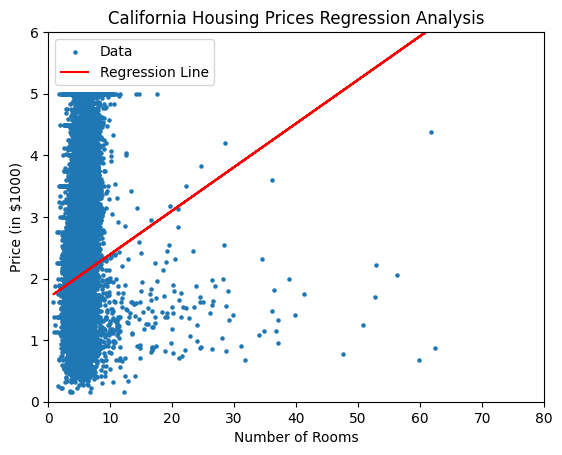

In [57]:
plt.scatter(x, y, s=5, label='Data')

# Regression line
regression_line = w0 + w1 * x
plt.plot(x, regression_line, color='red', label='Regression Line')

# Set limits for x-axis and y-axis
plt.xlim(0, 80)  # Limit x-axis from 0 to 80
plt.ylim(0, 6)   # Limit y-axis from 0 to 6

plt.xlabel('Number of Rooms')
plt.ylabel('Price (in $1000)')
plt.title('California Housing Prices Regression Analysis')
plt.legend()
plt.show()

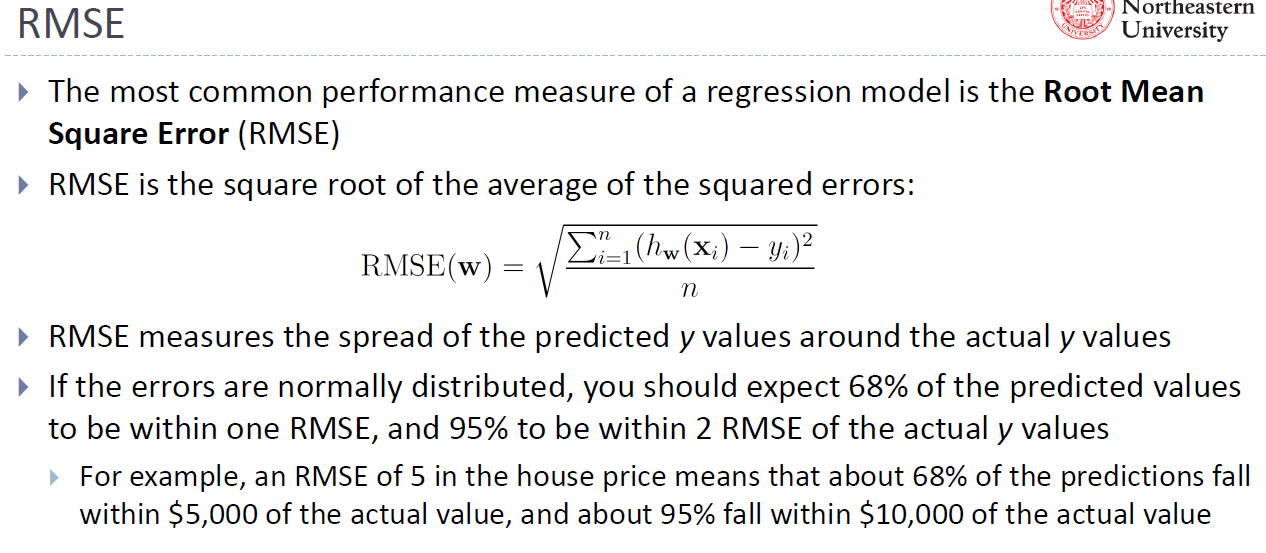

In [58]:
#Finding RMSE directly
rmse = np.sqrt(np.sum((regression_line - y)**2) / n)
print('RMSE:', rmse)

RMSE: 1.1405293026707128


In [59]:
#Finding the rmse using function:
from sklearn.metrics import mean_squared_error as MSE

rmse = np.sqrt(MSE(y, regression_line))
print('RMSE:', rmse)

RMSE: 1.1405293026707128


In [60]:
#Mean Absolute Error

from sklearn.metrics import mean_absolute_error as MAE

mae = MAE(y, regression_line)
print('MAE:', mae)

MAE: 0.8961785484309858


In [61]:
# R**2 Score
from sklearn.metrics import r2_score

r2 = r2_score(y, regression_line)
print('R2 Score:', r2)

R2 Score: 0.023088282755354017


In [62]:
#MAE

from sklearn.metrics import mean_absolute_error as MAE

mae= MAE(y, regression_line)
print('MAE:', mae)

MAE: 0.8961785484309858
